In [788]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# csv data
header_names = ["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df = pd.read_csv("water_potability.csv", header = None, names = header_names)
df.head()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [789]:
# mean, standar deviasi, nilai minimum, nilai maksimum, kuartil
df.describe()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.00000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,1005.50000,7.087193,195.969209,21904.673439,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497,0.402985
std,580.38134,1.572803,32.643166,8625.397911,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471,0.490620
min,1.00000,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,503.25000,6.090785,176.740657,15614.412962,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882,0.000000
50%,1005.50000,7.029490,197.203525,20926.882155,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,1507.75000,8.053006,216.447589,27170.534649,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,2010.00000,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [790]:
# median
df.median()

id                  1005.500000
pH                     7.029490
Hardness             197.203525
Solids             20926.882155
Chloramines            7.142014
Sulfate              332.214113
Conductivity         423.438372
OrganicCarbon         14.323286
Trihalomethanes       66.482041
Turbidity              3.967374
Potability             0.000000
dtype: float64

In [791]:
# modus
df.mode()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,2007,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,2008,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN
2008,2009,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249,NaN


In [792]:
# range
df.max() - df.min()

id                  2009.000000
pH                    13.772501
Hardness             243.845890
Solids             56167.729801
Chloramines           11.736129
Sulfate              352.030642
Conductivity         551.722883
OrganicCarbon         24.806707
Trihalomethanes      115.422987
Turbidity              5.044749
Potability             1.000000
dtype: float64

In [793]:
# IQR
df.quantile(0.75) - df.quantile(0.25)

id                  1004.500000
pH                     1.962221
Hardness              39.706932
Solids             11556.121687
Chloramines            1.971607
Sulfate               51.641161
Conductivity         115.590553
OrganicCarbon          4.561031
Trihalomethanes       21.344620
Turbidity              1.071781
Potability             1.000000
dtype: float64

In [794]:
# variansi
df.var()

id                 3.368425e+05
pH                 2.473709e+00
Hardness           1.065576e+03
Solids             7.439749e+07
Chloramines        2.512904e+00
Sulfate            1.698356e+03
Conductivity       6.512792e+03
OrganicCarbon      1.106075e+01
Trihalomethanes    2.586021e+02
Turbidity          6.091350e-01
Potability         2.407079e-01
dtype: float64

In [795]:
# skewness
df.skew()

id                 0.000000
pH                 0.048535
Hardness          -0.085321
Solids             0.591011
Chloramines        0.013003
Sulfate           -0.045728
Conductivity       0.268012
OrganicCarbon     -0.020220
Trihalomethanes   -0.051383
Turbidity         -0.032266
Potability         0.395873
dtype: float64

In [796]:
# kurtosis
df.kurtosis()

id                -1.200000
pH                 0.626904
Hardness           0.525480
Solids             0.337320
Chloramines        0.549782
Sulfate            0.786854
Conductivity      -0.237206
OrganicCarbon      0.031018
Trihalomethanes    0.223017
Turbidity         -0.049831
Potability        -1.845122
dtype: float64

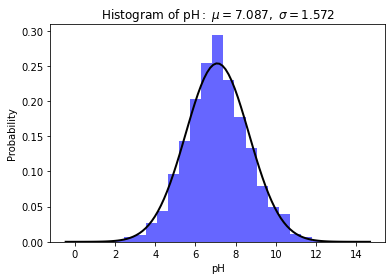

In [797]:
# Histogram dan boxplot kolom pH

data = []
for item in df["pH"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('pH')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ pH:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

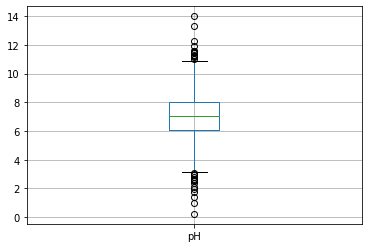

In [798]:
df.boxplot(column = ["pH"])

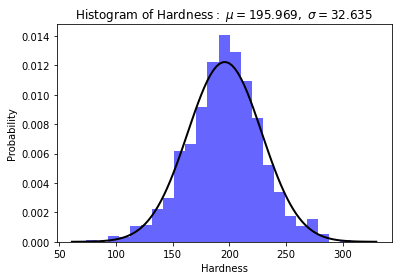

In [799]:
# Histogram dan boxplot kolom Hardness

data = []
for item in df["Hardness"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Hardness')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Hardness:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

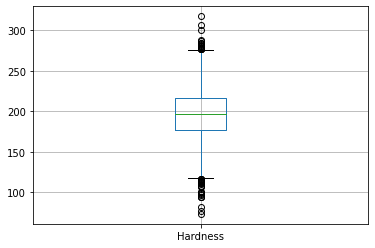

In [800]:
df.boxplot(column = ["Hardness"])

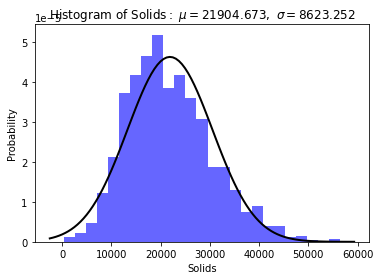

In [801]:
# Histogram dan boxplot kolom Solids

data = []
for item in df["Solids"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Solids')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Solids:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

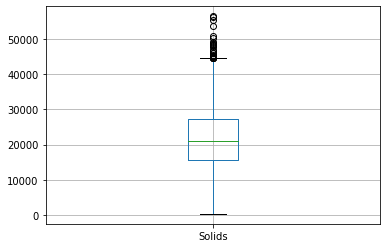

In [802]:
df.boxplot(column = ["Solids"])

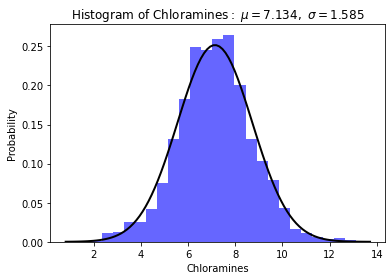

In [803]:
# Histogram dan boxplot kolom Chloramines

data = []
for item in df["Chloramines"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Chloramines')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Chloramines:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

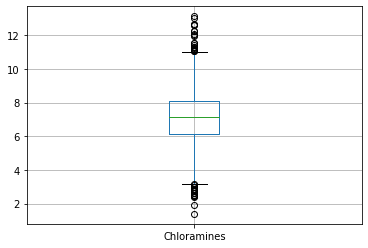

In [804]:
df.boxplot(column = ["Chloramines"])

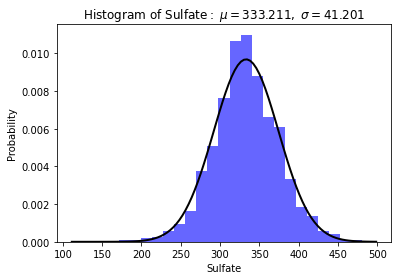

In [805]:
# Histogram dan boxplot kolom Sulfate

data = []
for item in df["Sulfate"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Sulfate')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Sulfate:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

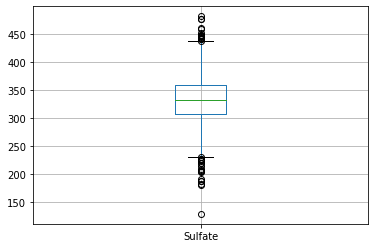

In [806]:
df.boxplot(column = ["Sulfate"])

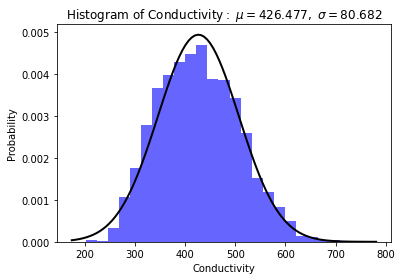

In [807]:
# Histogram dan boxplot kolom Conductivity

data = []
for item in df["Conductivity"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Conductivity')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Conductivity:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

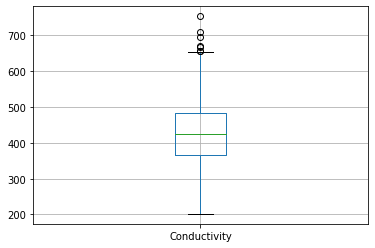

In [808]:
df.boxplot(column = ["Conductivity"])

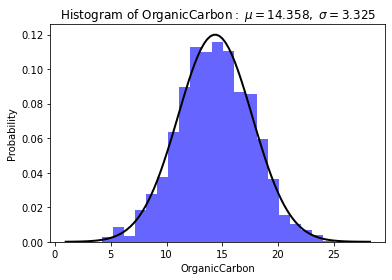

In [809]:
# Histogram dan boxplot kolom OrganicCarbon

data = []
for item in df["OrganicCarbon"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('OrganicCarbon')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ OrganicCarbon:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

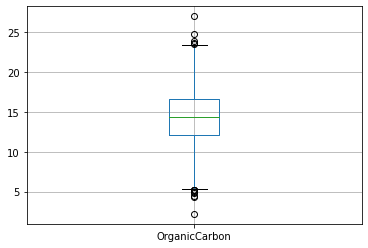

In [810]:
df.boxplot(column = ["OrganicCarbon"])

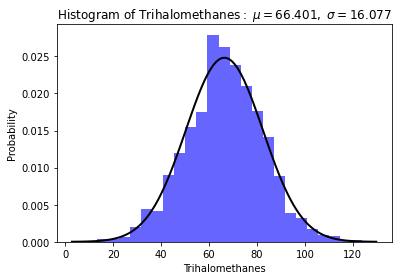

In [811]:
# Histogram dan boxplot kolom Trihalomethanes

data = []
for item in df["Trihalomethanes"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Trihalomethanes')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Trihalomethanes:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

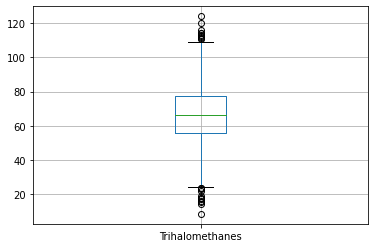

In [812]:
df.boxplot(column = ["Trihalomethanes"])

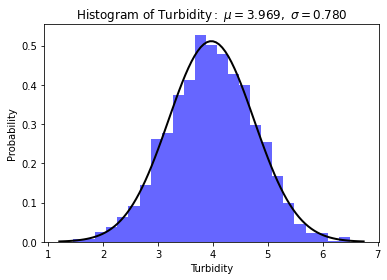

In [813]:
# Histogram dan boxplot kolom Turbidity

data = []
for item in df["Turbidity"]:
    data.append(item)

# Fit a normal distribution to the data:
# mean and standard deviation
mu, sigma = norm.fit(data) 
  
# Plot the histogram of data.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the normal distribution.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Turbidity')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Turbidity:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
  
plt.show()

<AxesSubplot:>

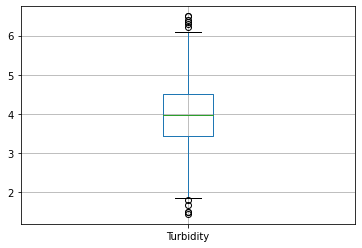

In [814]:
df.boxplot(column = ["Turbidity"])